########################################################################################################
############################## -- Machine Learning for Data Science --##################################

Autores : José Cárdenas - André Chávez 

## Guía de Modelamiento de Información

#### 1 LIBRERÍAS A UTILIZAR

In [341]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [342]:
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [267]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [171]:
train.loc[(train['Gender']=='Female')&(train['LoanAmount']>=300),['Gender']]

,Gender
561,Female
600,Female
604,Female


In [172]:
#train.iloc[1:10,[2,5,9]]
#train.loc[lambda a: (a.Gender=="Female")&(a.Married=="No"),['Gender','Married']]
#train.loc[(train['Gender']=='Male') | (train['Loan_Amount_Term']>=360),['Gender','Married','Education']]

In [173]:
#Leer los primeros registros.
#train.head(3) # Puedes visualizar la cantidad de registro que requieras
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [174]:
# Podemos ver la estructura de los datos
print('Estructura de los datos') 
[(col, type(train[col][0])) for col in train.columns] 

Estructura de los datos


[('Loan_ID', str),
 ('Gender', str),
 ('Married', str),
 ('Dependents', str),
 ('Education', str),
 ('Self_Employed', str),
 ('ApplicantIncome', numpy.int64),
 ('CoapplicantIncome', numpy.float64),
 ('LoanAmount', numpy.float64),
 ('Loan_Amount_Term', numpy.float64),
 ('Credit_History', numpy.float64),
 ('Property_Area', str),
 ('Loan_Status', str)]

#### 3 EXPLORACION DE LA DATA

#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [175]:
train.describe() #Resumen de la información

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [176]:
train.shape

(614, 13)

La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

#### Aquí hay algunas conclusiones

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [177]:
# Tabla Resumen
train.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001086,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [178]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

(0, 140)

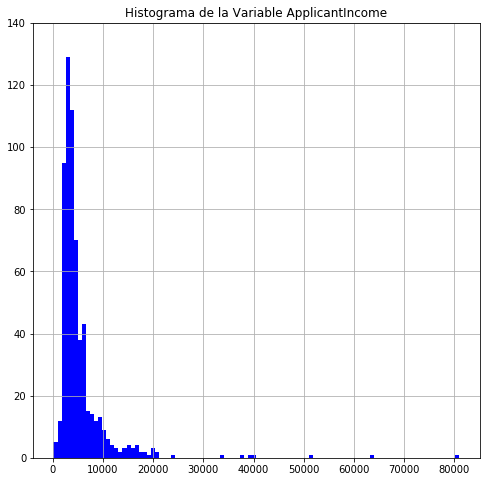

In [179]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable ApplicantIncome')
train['ApplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)
plt.ylim(0,140)

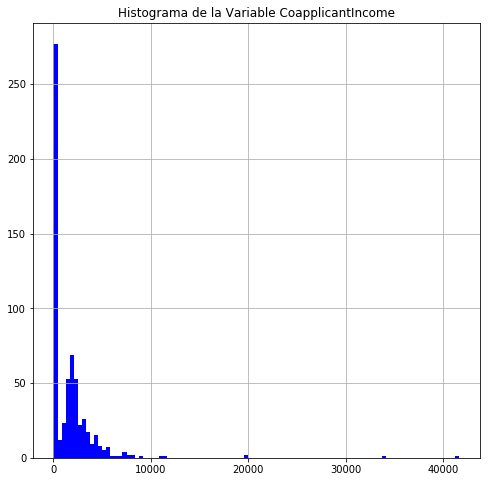

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
train['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

### Cuartiles y diagramas de cajas

Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



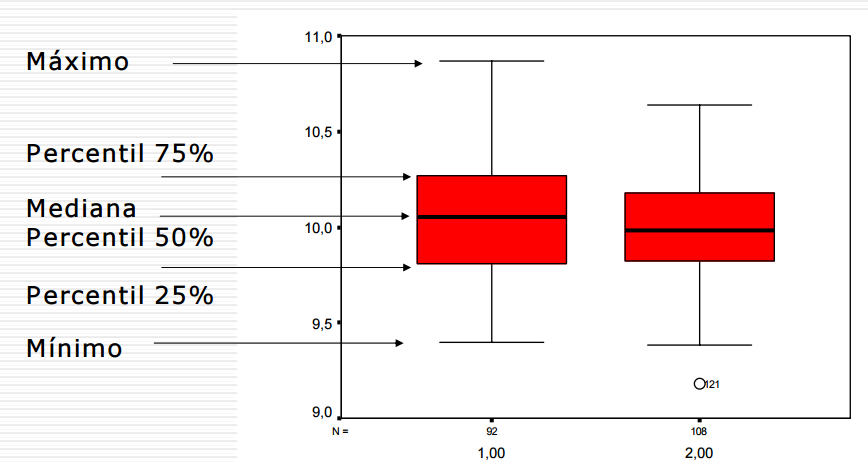

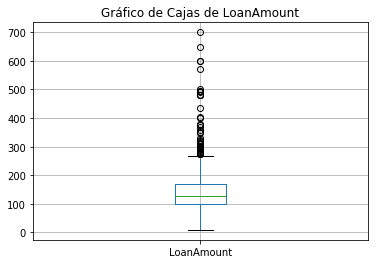

In [181]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de LoanAmount')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
train.boxplot(column='LoanAmount')

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


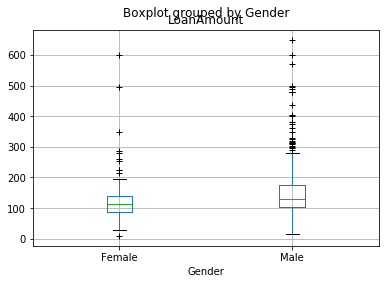

In [182]:
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5,by='Gender')

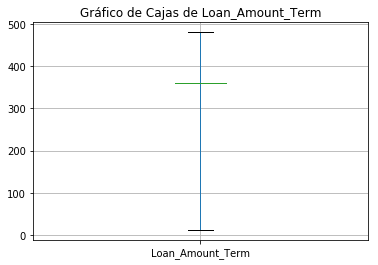

In [183]:
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de Loan_Amount_Term')
train.boxplot(column='Loan_Amount_Term',autorange='T',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

In [184]:
# Tablas de contingencia para variables cualitativas

In [185]:
# Tabla de Contingencia para la Variable Loan_Status
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(train["Loan_Status"],columns="count",normalize='all')
my_tab

col_0,count
Loan_Status,
N,0.312704
Y,0.687296


In [186]:
# Tabla de Contingencia para la Variable Gender
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(index=train["Gender"],columns="count",normalize='all')
my_tab

col_0,count
Gender,
Female,0.186356
Male,0.813644


In [187]:
# Tabla de Contingencia para la Variable Married
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(index=train["Married"],columns="count")
my_tab

col_0,count
Married,
No,213
Yes,398


#### 4 IMPUTACION DE LA DATA

In [343]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [189]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [190]:
# Conocimiento de los tipos o tipología de datos

In [191]:
# Viendo las variables por tipo de datos
tipos = train.columns.to_series().groupby(train.dtypes).groups
tipos

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

In [344]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") # Leer el dataset en un dataframe usando pandas
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [193]:
# Revisamos si la recodigicación fue la idónea
train.describe(include='all') 
#train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.813644,1.651391,1.762938,1.218241,1.140893,5403.459283,1621.245798,146.412162,342.00000,1.842199,2.037459,0.687296
std,NaN,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.00000,1.000000,1.000000,0.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,2.000000,1.000000,0.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.000000,2.000000,1.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.000000,3.000000,1.000000


In [345]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [195]:
# Revisamos si la recodigicación fue la idónea
#test.describe(include='all') 
#test.head(10)

In [346]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()

In [347]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())    

In [198]:
#train_parametrica.describe()

In [348]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [350]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [351]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [352]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mean())  

In [353]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [204]:
# Imputación No Paramétrica

In [205]:
train_no_parametrica=train.copy()
train_no_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0


In [206]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_no_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [207]:
# Le quitamos la variable Loan_ID
train_no_parametrica = train_no_parametrica.drop('Loan_ID', axis=1)

In [208]:
from xgboost import XGBClassifier

In [209]:
train_no_parametrica.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1


In [210]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") # Leer el dataset en un dataframe usando pandas
train_no_parametrica['Dependents'] = train_no_parametrica['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train_no_parametrica['Gender'] = train_no_parametrica['Gender'].replace({'Female': 1,'Male': 2})
train_no_parametrica['Married'] = train_no_parametrica['Married'].replace({'No': 1,'Yes': 2})
train_no_parametrica['Self_Employed'] = train_no_parametrica['Self_Employed'].replace({'No': 1,'Yes': 2})
train_no_parametrica['Education'] = train_no_parametrica['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train_no_parametrica['Credit_History'] = train_no_parametrica['Credit_History'].replace({0: 1,1: 2})
train_no_parametrica['Property_Area'] = train_no_parametrica['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train_no_parametrica['Loan_Status'] = train_no_parametrica['Loan_Status'].replace({'N': 0,'Y': 1})

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [ ]:
# Imputación meiante ML
# Imputación mediante XGBoost
#from xgboost import XGBClassifier
#for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']:
#    df_input = train_no_parametrica[train_no_parametrica[column].notnull()]
#    xgb = XGBClassifier()
#    xgb.fit(df_input.drop(column, axis=1), df_input[column])
#    y_pred = xgb.predict(train_no_parametrica.drop(column, axis=1))
#    nulls = train_no_parametrica[train_no_parametrica[column].isnull()]
#    for ni in nulls.index:
#        train_no_parametrica.loc[ni, column] = y_pred[ni]

In [ ]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_no_parametrica.apply(num_missing, axis=0)) 

In [299]:
test_parametrica.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3
2,LP001031,2.0,2,3.0,1,1.0,5000,1800,208.0,360.0,2.0,3
3,LP001035,2.0,2,3.0,1,1.0,2340,2546,100.0,360.0,2.0,3
4,LP001051,2.0,1,1.0,2,1.0,3276,0,78.0,360.0,2.0,3


from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
import numpy as np
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.layers import Input
import tensorflow as tf

#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [ ]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [ ]:
train_parametrica

In [354]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']+1),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

#Creamos las variables para la validación o test


test_parametrica['TotalIncome'] = test_parametrica['ApplicantIncome'] + test_parametrica['CoapplicantIncome']
test_parametrica['LoanAmount_Log'] = round(np.log(test_parametrica['LoanAmount']+1),2)
test_parametrica['AmountxTerm']=round(test_parametrica['LoanAmount']/test_parametrica['Loan_Amount_Term'],2)


In [355]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1,5849.0,4.86,0.36
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0,6091.0,4.86,0.36


##### Creación de Variables No Paramétricamente o por Arboles de Decisión

In [ ]:
#Creamos nuevas variables a partir de cortes que obtenemos del árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
feature_cols = ['ApplicantIncome']
X_train=train_parametrica[feature_cols] # Ponemos la variable independiente o feature para poder ver cortes.
Y_train=train_parametrica[['Loan_Status']] # Ponemos la variable dependiente.
treeclf = DecisionTreeClassifier(max_depth=1, random_state=1) # Acá definimos los parámetros del árbol
treeclf.fit(X_train, Y_train)  # Ajusto un algoritmo sobre unas covariables y una vd
export_graphviz(treeclf, out_file='Recod_ApplicantIncome02.dot', feature_names=feature_cols)

In [356]:
# Creamos una lista vacía para guardar los nuevos valores de los campos creados
ApplicantIncome_Recod = []
# Para cada fila o registro en la variable ApplicantIncome , le aplicamos 
for row in train_parametrica['ApplicantIncome']:
    # Si el registro es menor al valor ,
    if row <1921:
        # Recodificar la variable con 1
        ApplicantIncome_Recod.append(1)
     
    else: # Sino
        # Recodificar la variable con 2
        ApplicantIncome_Recod.append(2)
        
# Create a column from the list
train_parametrica['ApplicantIncome_Recod'] = ApplicantIncome_Recod

In [357]:
# Creamos una lista vacía para guardar los nuevos valores de los campos creados
ApplicantIncome_Recod = []
# Para cada fila o registro en la variable ApplicantIncome , le aplicamos 
for row in test_parametrica['ApplicantIncome']:
    # Si el registro es menor al valor ,
    if row <1921:
        # Recodificar la variable con 1
        ApplicantIncome_Recod.append(1)
     
    else: # Sino
        # Recodificar la variable con 2
        ApplicantIncome_Recod.append(2)
        
# Create a column from the list
test_parametrica['ApplicantIncome_Recod'] = ApplicantIncome_Recod

In [305]:
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm,ApplicantIncome_Recod
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1,5849.0,4.86,0.36,2
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0,6091.0,4.86,0.36,2


In [358]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)
train_parametrica.shape

(614, 16)

In [359]:
###############################################
###### Acá hice el cambio en el código ########
###############################################
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], test_size=0.30,
                                                   random_state=100)

In [360]:
# EL train y test lo concateno para poder mantener el mismo formato y codigo
train_parametrica = pd.concat([X_train, y_train], axis=1)

In [361]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_parametrica.Loan_Status.value_counts()

1    300
0    129
Name: Loan_Status, dtype: int64

#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



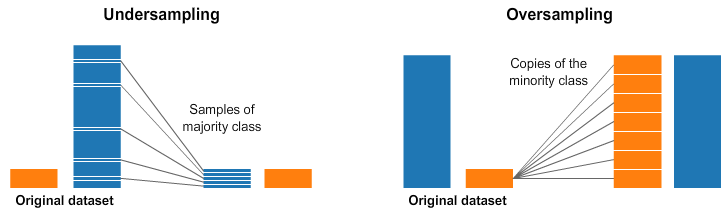

Clase 0: 129
Clase 1: 300
Proportion Clase 0: 0.3 : 0
Proportion Clase 1: 0.7 : 1


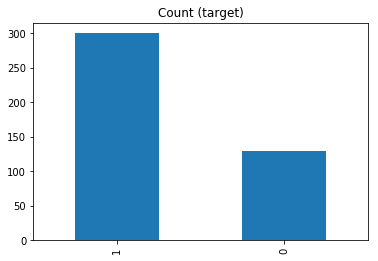

In [309]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_parametrica.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');



In [310]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_parametrica.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_parametrica[train_parametrica['Loan_Status'] == 0]
df_class_1 = train_parametrica[train_parametrica['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Undersampling o sub-muestreo

In [ ]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de 
# elementos de la clase 0.
df_class_1_under = df_class_1.sample(count_class_0)
df_balanceado_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_balanceado_under.Loan_Status.value_counts())

df_balanceado_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
# Podemos usar el dataset generado por undersampling para aplicar todos los algoritmos deseados
df_balanceado_under.head(3)

#### Oversampling o sobre-muestreo

In [ ]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');
df_balanceado_over.head(2)

In [ ]:
# Podemos usar el dataset generado por oversampling para aplicar todos los algoritmos deseados
df_balanceado_over.head(3)
#df_balanceado_over.describe() Podemos verificar cuántos elementos tenemos por under y over sampling

### Métodos de Balanceo Sofisticados

#### RandomUnderSampling

In [362]:
# Creamos nuestra matriz de datos o variables independientes y 
# nuestro vector columna con la variable independiente
#train_parametrica = train_parametrica.drop('Loan_ID', axis=1)
X, y = train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status']

In [316]:
#import imblearn
#X.head(3)
#y.head(3)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

In [317]:
import numpy as np
import pandas as pd
columns_X = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']
columns_y = ['Loan_Status']
df_X_rus = pd.DataFrame(data=X_rus,columns=columns_X)
df_y_rus = pd.DataFrame(data=y_rus,columns=columns_y)

# Concatenamos la información
df_balanceado_rus = pd.concat([df_X_rus, df_y_rus], axis=1)

In [ ]:
#df_balanceado_rus.head(3)
df_balanceado_rus.Loan_Status.value_counts()

#### RandomOverSampling

In [363]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

# Tenemos identificados los nombres de las columnas para el dataframe
columns_X = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']
columns_y = ['Loan_Status']

df_X_ros = pd.DataFrame(data=X_ros,columns=columns_X)
df_y_ros = pd.DataFrame(data=y_ros,columns=columns_y)

# Concatenamos la información
df_balanceado_ros = pd.concat([df_X_ros, df_y_ros], axis=1)

In [326]:
#df_balanceado_ros.head(2)
#df_balanceado_ros.describe()
df_balanceado_ros.Loan_Status.value_counts()

1    300
0    300
Name: Loan_Status, dtype: int64

#### Balenceo de Datos TomekLink

La imputación TomekLink son pares de instancias muy cercanas, pero de clases opuestas. Eliminar las instancias de la clase mayoritaria de cada par aumenta el espacio entre las dos clases, lo que facilita el proceso de clasificación.

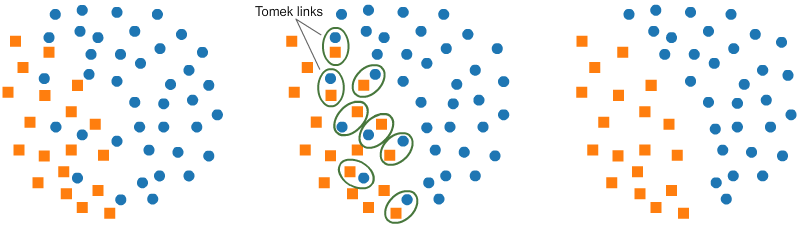

In [ ]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl,id_tl  = tl.fit_sample(X, y)

# Tenemos identificados los nombres de las columnas para el dataframe
columns_X = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']
columns_y = ['Loan_Status']

df_X_tl = pd.DataFrame(data=X_tl,columns=columns_X)
df_y_tl = pd.DataFrame(data=y_tl,columns=columns_y)

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

In [ ]:
#df_balanceado_tl.head(3)
df_balanceado_tl.Loan_Status.value_counts()

### Imputación UnderSampling: Centros de Conglomerados

Esta técnica realiza submuestreo generando centroides basados en métodos de agrupamiento. Los datos se agruparán previamente por similitud, a fin de preservar la información.

En este ejemplo, pasaremos el dict {1: 192} para la relación de parámetros, para preservar 192 elementos de la clase mayoritaria (1) y todos los elementos de la clase minoritaria (0).

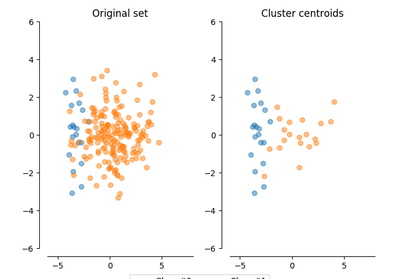

In [ ]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 192})
X_cc, y_cc = cc.fit_sample(X, y)

# Tenemos identificados los nombres de las columnas para el dataframe
columns_X = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']
columns_y = ['Loan_Status']

df_X_cc = pd.DataFrame(data=X_cc,columns=columns_X)
df_y_cc = pd.DataFrame(data=y_cc,columns=columns_y)

# Concatenamos la información
df_balanceado_cc = pd.concat([df_X_cc, df_y_cc], axis=1)

In [ ]:
#df_balanceado_cc.head(2)
#df_balanceado_cc.describe()
df_balanceado_cc.Loan_Status.value_counts()

### Imputación OverSampling: SMOTE

SMOTE (Técnica de sobremuestreo de Minorías Sintéticas) consiste en la síntesis de elementos para la clase minoritaria, basados en los que ya existen. Funciona eligiendo al azar un punto de la clase minoritaria y calcula los k vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus vecinos.

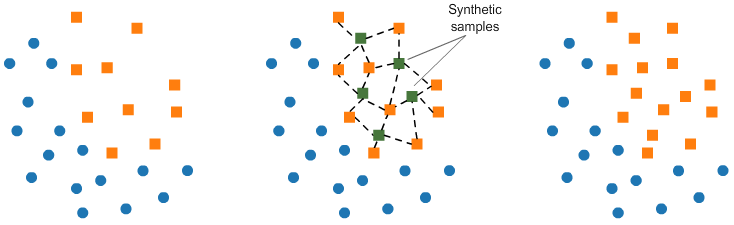

In [318]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)
83

# Tenemos identificados los nombres de las columnas para el dataframe
columns_X = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']
columns_y = ['Loan_Status']

df_X_sm = pd.DataFrame(data=X_sm,columns=columns_X)
df_y_sm = pd.DataFrame(data=y_sm,columns=columns_y)

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [319]:
df_balanceado_sm.head(3)
#df_balanceado_sm.describe()
#df_balanceado_sm.Loan_Status.value_counts()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,ApplicantIncome_Recod,Loan_Status
0,1.0,1.0,1.0,1.0,1.0,3086.0,0.0,120.0,360.0,2.0,2.0,3086.0,4.80,0.33,2.0,1
1,2.0,2.0,1.0,1.0,1.0,3716.0,0.0,42.0,180.0,2.0,1.0,3716.0,3.76,0.23,2.0,1
2,2.0,2.0,1.0,1.0,1.0,2768.0,1950.0,155.0,360.0,2.0,1.0,4718.0,5.05,0.43,2.0,1


### Imputación Over-sampling seguido de under-sampling (SMOTE + Tomek links)

Ahora, haremos una combinación de sobremuestreo y submuestreo, usando las técnicas de enlaces SMOTE y Tomek:

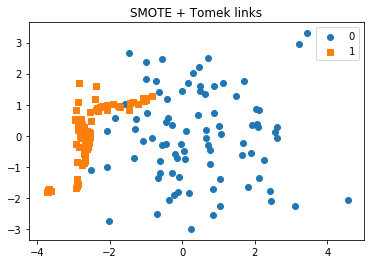

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)


# Tenemos identificados los nombres de las columnas para el dataframe
columns_X = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']
columns_y = ['Loan_Status']

df_X_smt = pd.DataFrame(data=X_smt,columns=columns_X)
df_y_smt = pd.DataFrame(data=y_smt,columns=columns_y)

# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [ ]:
#df_balanceado_smt.head(3)
#df_balanceado_smt.describe()
df_balanceado_smt.Loan_Status.value_counts()


## Selección de Drivers

### Selección de Drivers Mediante Técnicas Paramétricas

#### Selección Univariada

Las pruebas estadísticas se pueden usar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida.
La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

In [ ]:
### Utilizamos la información obtenida con el balanceo mediante la metodología SMOTE
df_balanceado_ros.head(3)
#X_sm.shape
#y_sm.shape

In [ ]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_ros, y_ros)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_*100)

# horizontal bar plot of feature importance
pos = np.arange(15) + 0.5
plt.barh(pos, fit.scores_, align='center')
plt.title("Feature Importance")
plt.xlabel("Model chi2")
plt.ylabel("Features")
plt.yticks(pos, ('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod'))
plt.grid(True)

#### Eliminación de Variables Recursivas

La eliminación de características recursivas (RFE) funciona mediante la eliminación recursiva de atributos y la construcción de un modelo en los atributos que permanecen.
Utiliza la precisión del modelo para identificar qué atributos (y combinación de atributos) contribuyen más a la predicción del atributo objetivo.

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_ros, y_ros)

# horizontal bar plot of feature importance
pos = np.arange(15) + 0.5
plt.barh(pos, fit.ranking_, align='center')
plt.title("Feature Importance")
plt.xlabel("Número de Modelos")
plt.ylabel("Features")
plt.yticks(pos, ('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod'))
plt.grid(True)

### Selección de Drivers Mediante Técnicas de Machine Learning

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


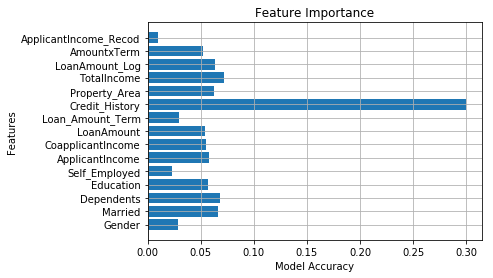

In [323]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X_sm, y_sm)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(15) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod'))
plt.grid(True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_ros, y_ros)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_sm.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_ros.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_ros.shape[1]), indices)
plt.xlim([-1, X_ros.shape[1]])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC()
forest.fit(X_ros, y_ros)
importances = forest.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(15) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod'))
plt.grid(True)


#### 7 MODELADO DE LA DATA

In [364]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

#### Partición de la Data en Train y Test

In [365]:
# ESTA ES LA PARTE MAS IMPORTANTE DE MODELAR
# Creamos la matriz de variables independientes X (VI)y el vector columna de VD loan_Amount_Log no son relevantes por ende 
# podemos prescindir de alguna de ellas
# Pudimos observar en el feature selection que las variables Loan_Amount_Term y LoanAmount_Log
df_balanceado_ros2 = df_balanceado_ros[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod','Loan_Status']]#,df_balanceado_smt['Loan_Status'] #Axis = 1 por columnas


In [366]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train =df_balanceado_ros2.drop('Loan_Status',axis=1)
y_train = df_balanceado_ros2['Loan_Status']

#### Modelos Supervisados : Regresión Logística

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train) # Entrenamiento del modelo


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [368]:
y_pred=lr.predict(X_test) # Prediccion sobre el test

In [ ]:
#Atributos
#lr.coef_ 
#lr.score(X, y)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

In [ ]:
# Selección de Drivers Paramétricos (Prueba para observar la salida)

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
X_train_lr = X_train[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_lr)
result=logit_model.fit()
print(result.summary())


#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
lr = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [ ]:
X_train.head(5)

In [ ]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [ ]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = lr.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Logistica0001.csv', index=False)

#### Modelos Supervisados : KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = neigh.predict(X_test)

In [ ]:
#Atributos
#lr.coef_ 
#lr.score(X, y)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
knn = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
scoring = 'accuracy'
results = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [ ]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [ ]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = neigh.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('KNN0001.csv', index=False)

#### Modelos Supervisados : Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

NB = GaussianNB()
NB.fit(X_train, y_train)
GaussianNB(priors=None)

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = NB.predict(X_test)

In [ ]:
#Atributos
#lr.class_prior_ ,class_count_ ,theta_ sigma_ 

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
NB = GaussianNB()
scoring = 'accuracy'
results = model_selection.cross_val_score(NB, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

NB = GaussianNB()
NB.fit(X_train, y_train)

knn_roc_auc = roc_auc_score(y_test, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

#### Modelos Supervisados : Arboles de Clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt',max_depth=20)
arb.fit(X_train, y_train)

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = arb.predict(X_test)

In [ ]:
#Atributos
#arb.classes_ ,feature_importances_ ,max_features_ ,tree_ 

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
scoring = 'accuracy'
results = model_selection.cross_val_score(arb, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
arb.fit(X_train, y_train)

arbol_roc_auc = roc_auc_score(y_test, arb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, arb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Arbol CART (area = %0.2f)' % arbol_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Arbol_CART_ROC')
plt.show()

In [ ]:
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [ ]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = arb.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Vidhya_Arbolito2.csv', index=False)

In [ ]:
# Si deseamos mejorar nuestro Arbol de Clasificación, podemos hacer un tunning de parámetros
# Podemos comenzar calibrando alguno de los parámetros, por ejemplo 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, cv=5, refit='AUC')

gs.fit(X_train, y_train)
results = gs.cv_results_

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

#### Modelos Supervisados : Máquinas de Soporte Vectorial

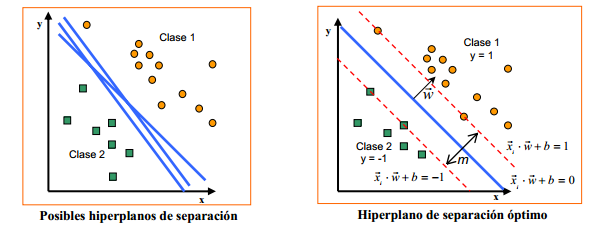

In [ ]:
# Otros modelos de SVM (Distintos Kernels)
  ## svm.SVC(kernel='rbf', gamma=0.7, C=1)
  ## svm.SVC(kernel='poly', degree=3, C=1)

In [ ]:
from sklearn import svm
# Parámetros disponibles:
# Kernel disponibles en Python ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ 
# degree : Opcional , por defecto 3,se usa para el Kernel Polinomial.
# gamma : Coeficiente de Kernel para 'rbf', 'poly' y 'sigmoid'. Si gamma es 'auto', entonces se usarán 1 / n° features en su lugar.
# shrinking : Contracción de parámetros, por defecto es T
# tol : Tolerancia para el criterio de parada.
# random_state : Semilla aleatoria 
# Demora así que tener cuidado
C = 1.0  # parametro de regulacion SVM 
svc = svm.SVC(kernel='linear', C=C)
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)
#svmkl=svm.SVC(kernel="linear", C=0.025)
svc.fit(X_train, y_train)

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = svc.predict(X_test)

In [ ]:
#Atributos
#arb.classes_ ,feature_importances_ ,max_features_ ,tree_ 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

In [ ]:
# Dejarlo correr con tiempo, aprox 6 minutos
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=2, random_state=7)
svc = svm.SVC(kernel='linear', C=1)
scoring = 'accuracy' # Podemos también cambiar la métrica , por ejemplo :
# ‘accuracy’ ‘average_precision’ ‘f1’ ‘precision’ ‘recall’
results = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Modelos Supervisados : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Parámetros  :
# max_features : None ,'sqrt',%X
# n_estimators  : Número de árboles a utilizar
# min_sample_leaf : Tamaño mínimo de elementos en hojas terminales (Nodos hijos)
# random_state : Semilla aleatoria
# oob_score : Error fuera de bolsa
#rf = RandomForestClassifier(max_features=4 , n_estimators=200,oob_score=True,max_depth=2)
rf = RandomForestClassifier(max_features=7,n_estimators=500,oob_score=True,max_depth=10,
                            min_samples_leaf=30)
rf.fit(X_train, y_train) # Entrenando un algoritmo

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = rf.predict(X_test)

In [ ]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# Probar con diferentes parámetros de min_samples_leaf = 20
kfold = model_selection.KFold(n_splits=10, random_state=7)
rf = RandomForestClassifier(max_features='sqrt', n_estimators=500,oob_score=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

rf = RandomForestClassifier(max_features=5 , n_estimators=200,oob_score=True,max_depth=2)
rf.fit(X_train, y_train)

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()

In [ ]:
#Le quitamos el ID para poder scorear o puntuar el modelo
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [ ]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = rf.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('RandomForest_003.csv', index=False)

#### Modelos Supervisados : Random Forest - Grid Search

In [ ]:
# Grid Search de Parámetros de Random Forest
# Cargar las librerías necesarias
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)

# Construir una función que nos ayude a poder elegir el mejor clasificador
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Modelo con rango: {0}".format(i))
            print("Validación de Score Promedio: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# Especificar los parámetros que uno desea buscar o encontrar (También un posible rango de valores)
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Correr los modelos con CV
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV tomó %.2f segundos para %d candidatos"
      " configuración de parámetros." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

#### Modelos Supervisados : Redes Neuronales

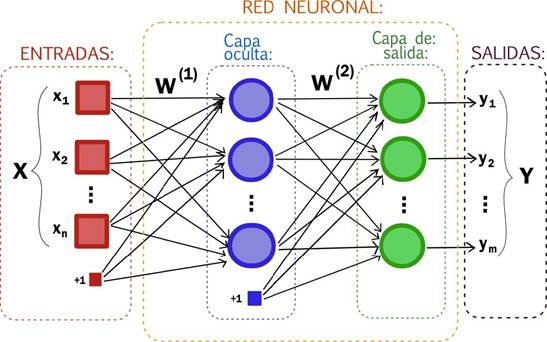

#### Perceptrón Multicapa

In [ ]:
from sklearn.neural_network import MLPClassifier
# Parámetros :
# hidden_layer_sizes=(5, 2) i-neurona elemento en la i-esima capa oculta
# activation : Función de activacion , {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, por defecto ‘adam’, método de optimización para los pesos
# alpha : por defecto 0.0001, término de regularización
# random_state : semilla aleatoria

RN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
RN.fit(X_train, y_train)   

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = RN.predict(X_test)

In [ ]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))

#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=5, random_state=7)
RN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
scoring = 'accuracy'
results = model_selection.cross_val_score(RN, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#### ¿ Es importante estandarizar en algunos algoritmos?

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  

# Las redes neuronales generalmente requieren una estandarización.
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train2 = scaler.transform(X_train)  

kfold = model_selection.KFold(n_splits=5, random_state=7)
# max_iter=1, warm_start=True
RNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
scoring = 'accuracy'
results = model_selection.cross_val_score(RN, X_train2, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import pandas as pd 
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

scaler = StandardScaler()  
scaler.fit(X_train)  
X_train2 = scaler.transform(X_train)

scaler.fit(X_test)  
X_test2 = scaler.transform(X_test)


RN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
RN.fit(X_train2, y_train)

RN_roc_auc = roc_auc_score(y_test, RN.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, RN.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RN (area = %0.2f)' % RN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Redes_Neuronales_ROC')
plt.show()

### AdaBoost

In [369]:
from sklearn.ensemble import AdaBoostClassifier
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
AdaBoost.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=100, random_state=None)

In [370]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = AdaBoost.predict(X_test)

In [371]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.778

	Precision: 0.758
	Recall: 0.975
	F1: 0.853



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [217]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=20, random_state=7)
AdaBoost=AdaBoostClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(AdaBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.785


In [58]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.39      0.55       112
          1       0.67      0.97      0.79       142

avg / total       0.78      0.72      0.69       254



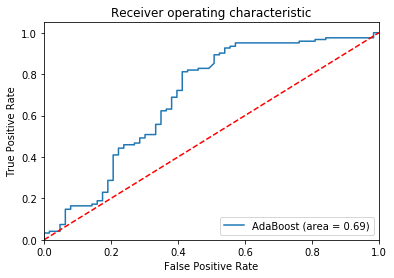

In [218]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

AdaBoost_roc_auc = roc_auc_score(y_test, AdaBoost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, AdaBoost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % AdaBoost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoost_ROC')
plt.show()

##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [373]:
df2 = test_parametrica.copy()

In [374]:
test_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,ApplicantIncome_Recod
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3,5720,4.71,0.31,2
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3,4576,4.84,0.35,2


In [377]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = AdaBoost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_AdaBoost_001.csv', index=False)

### GBM

In [378]:
from sklearn import ensemble

params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.70,
          'learning_rate': 0.01, 'min_samples_leaf': 20, 'random_state': 3}
Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1200,
              presort='auto', random_state=3, subsample=0.7, verbose=0,
              warm_start=False)

In [379]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = Gboost.predict(X_test)

In [380]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.741

	Precision: 0.776
	Recall: 0.852
	F1: 0.812



In [109]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
Gboost = ensemble.GradientBoostingClassifier(**params)
scoring = 'accuracy'
results = model_selection.cross_val_score(Gboost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.778


In [57]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77       112
          1       0.82      0.82      0.82       142

avg / total       0.80      0.80      0.80       254



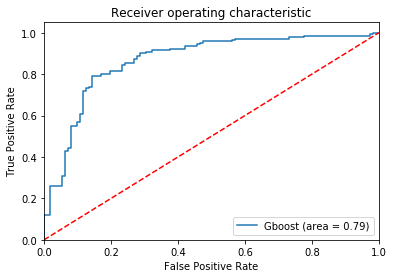

In [58]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train)

Gboost_roc_auc = roc_auc_score(y_test, Gboost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Gboost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gboost (area = %0.2f)' % Gboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gboost_ROC')
plt.show()

In [381]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [382]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = Gboost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('GBM_001.csv', index=False)

## Grid Search o Tuning de Parámetros

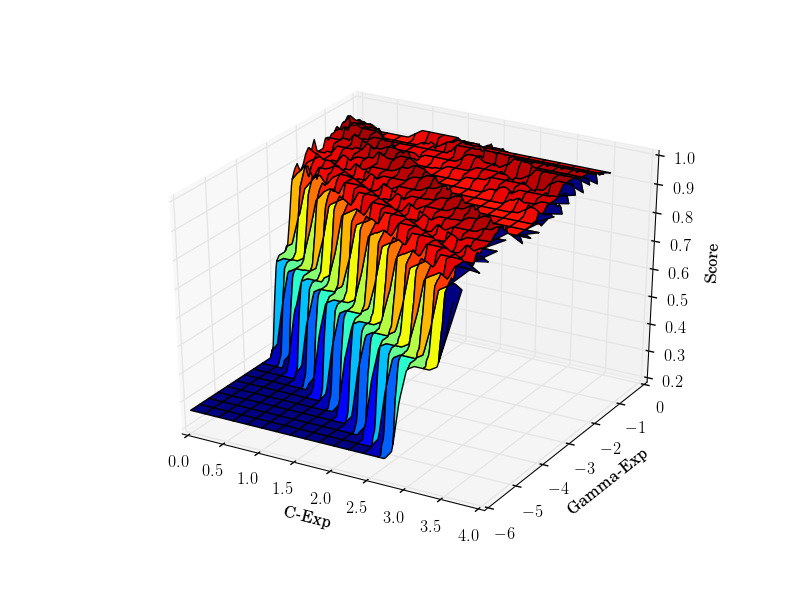

**Los parámtros del árbol se puede dividir en 3 categorías :**

1. Parámetros específicos del árbol: afectan a cada árbol individual en el modelo.
2. Parámetros de refuerzo: afectan la operación de refuerzo en el modelo.
3. Parámetros misceláneos: otros parámetros para el funcionamiento general.

#### Parámetros del Arbol

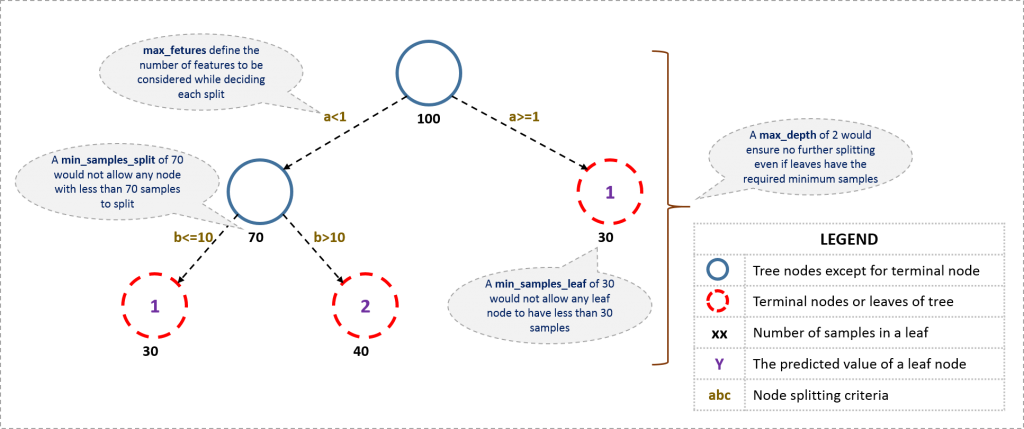

In [ ]:
# min_samples_split : Define el número mínimo de observaciones que se requieren en un nodo para ser consideradas 
# para la división.
# min_samples_leaf : Define el número mínimo de observaciones en hoja terminal.Por lo general, se deben elegir valores más 
# bajos para los problemas de clase desequilibrados porque las regiones en las que la clase minoritaria será mayoritaria serán 
# muy pequeñas.
# max_depth : Máxima profundidad del árbol
# max_leaf_nodes : Máximo número de hojas terminales.
# max_features : La cantidad de características que se deben considerar al buscar una mejor división

#### Parámetros del Boosting

In [ ]:
# learning_rate : Los valores más bajos son generalmente preferidos ya que hacen que el modelo sea robusto para las 
# características específicas del árbol y, por lo tanto, permite que se generalice bien.
# Los valores más bajos requerirían una mayor cantidad de árboles para modelar todas las relaciones y serán computacionalmente 
# costosos.
# n_estimadores : La cantidad de árboles que uno usará en el modelamiento.
# submuestra : La fracción de observaciones que se seleccionará para cada árbol.

#### Parámetros Misceláneos

In [ ]:
# loss : Se refiere a la función de pérdida que debe minimizarse en cada división. El predeterminado funciona bien.
# random_state : Semilla aleatoria.
# verbose : El tipo de salida que se imprimirá cuando el modelo termine de ajustarse.


In [61]:
#Importar librerías:

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [62]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    # Ajustamos el algoritmo sobre la data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_test)
    dtrain_predprob = alg.predict_proba(X_test)[:,1]
    
    #Rendimiento por cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,X_test, y_test, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8189
AUC Score (Train): 0.886192
CV Score : Mean - 0.758372 | Std - 0.054243 | Min - 0.7001499 | Max - 0.8530735


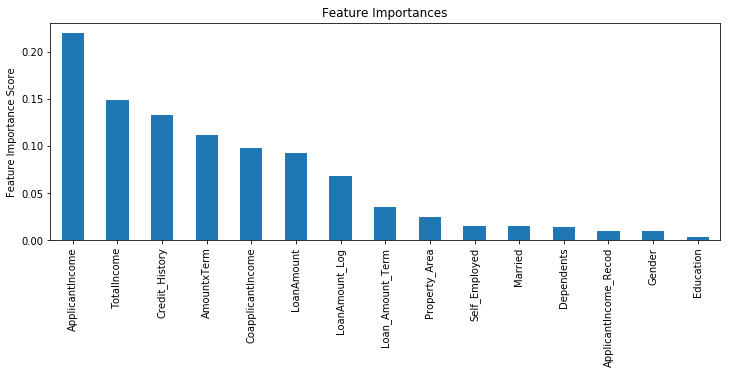

In [110]:
# Podemos comenzar construyendo un predictor Base, sobre el cual se puede ir mejorando
predictors = [x for x in X_train.columns]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, predictors)

In [111]:
# Elegir todos los predictores o algunos de ellos , primero tuneamos la cantidad de árboles
predictors = [x for x in train.columns]
param_test1 = {'n_estimators':list(range(100,1000,50))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [112]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.85732, std: 0.02649, params: {'n_estimators': 100},
  mean: 0.86463, std: 0.02959, params: {'n_estimators': 150},
  mean: 0.87483, std: 0.02372, params: {'n_estimators': 200},
  mean: 0.88116, std: 0.02775, params: {'n_estimators': 250},
  mean: 0.88162, std: 0.02750, params: {'n_estimators': 300},
  mean: 0.88093, std: 0.03000, params: {'n_estimators': 350},
  mean: 0.88381, std: 0.03007, params: {'n_estimators': 400},
  mean: 0.88525, std: 0.03017, params: {'n_estimators': 450},
  mean: 0.88439, std: 0.02864, params: {'n_estimators': 500},
  mean: 0.88531, std: 0.02926, params: {'n_estimators': 550},
  mean: 0.88629, std: 0.03053, params: {'n_estimators': 600},
  mean: 0.88882, std: 0.03141, params: {'n_estimators': 650},
  mean: 0.88917, std: 0.03050, params: {'n_estimators': 700},
  mean: 0.88980, std: 0.03060, params: {'n_estimators': 750},
  mean: 0.88992, std: 0.02929, params: {'n_estimators': 800},
  mean: 0.89050, std: 0.03054, params: {'n_estimators': 850},
  mean: 

In [113]:
# Después tuneamos la máxima profundidad y mínimo número de elementos para partir un nodo padre
param_test2 = {'max_depth':list(range(1,4,1)), 'min_samples_split':list(range(25,100,5))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=900, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 25},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 30},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 35},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 40},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 45},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 50},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 55},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 60},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 65},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 70},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 75},
  mean: 0.85023, std: 0.03583, params: {'max_depth': 1, 'min_samples_split': 80},
  mean: 0.85023,

In [114]:
# Después tuneamos el mínimo número de elementos para partir un nodo padre y la cantidad de elementos en un nodo hijo
param_test3 = {'min_samples_split':list(range(35,45,1)), 'min_samples_leaf':list(range(5,20,1))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier( min_samples_split=30,n_estimators=900,max_depth=3, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.89579, std: 0.02820, params: {'min_samples_leaf': 5, 'min_samples_split': 35},
  mean: 0.89614, std: 0.03413, params: {'min_samples_leaf': 5, 'min_samples_split': 36},
  mean: 0.89528, std: 0.03340, params: {'min_samples_leaf': 5, 'min_samples_split': 37},
  mean: 0.89021, std: 0.03200, params: {'min_samples_leaf': 5, 'min_samples_split': 38},
  mean: 0.89165, std: 0.03215, params: {'min_samples_leaf': 5, 'min_samples_split': 39},
  mean: 0.89747, std: 0.02776, params: {'min_samples_leaf': 5, 'min_samples_split': 40},
  mean: 0.89470, std: 0.03389, params: {'min_samples_leaf': 5, 'min_samples_split': 41},
  mean: 0.89147, std: 0.03497, params: {'min_samples_leaf': 5, 'min_samples_split': 42},
  mean: 0.89533, std: 0.02946, params: {'min_samples_leaf': 5, 'min_samples_split': 43},
  mean: 0.88992, std: 0.02995, params: {'min_samples_leaf': 5, 'min_samples_split': 44},
  mean: 0.89683, std: 0.03628, params: {'min_samples_leaf': 6, 'min_samples_split': 35},
  mean: 0.89654, std:

In [73]:
gbm03 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=900,max_depth=3,max_features='sqrt',
                                  subsample=0.8, random_state=10,min_samples_split=36,
                                  min_samples_leaf=11)


Model Report
Accuracy : 0.8701
AUC Score (Train): 0.927314
CV Score : Mean - 0.7484676 | Std - 0.08969748 | Min - 0.6136364 | Max - 0.856072


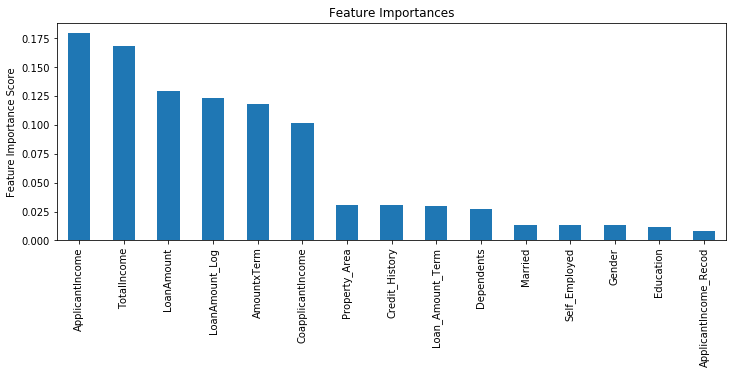

In [74]:
predictors = [x for x in X_train.columns]
modelfit(gbm03, X_train, predictors)

In [75]:
# Después tuneamos el número máximo de variables o features
param_test4 = {'max_features':list(range(2,15,1))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=900,max_depth=3,max_features='sqrt',
                                  subsample=0.8, random_state=10,min_samples_split=36,
                                  min_samples_leaf=11),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.89412, std: 0.02265, params: {'max_features': 2},
  mean: 0.89977, std: 0.02495, params: {'max_features': 3},
  mean: 0.89499, std: 0.02244, params: {'max_features': 4},
  mean: 0.89574, std: 0.02254, params: {'max_features': 5},
  mean: 0.89280, std: 0.02567, params: {'max_features': 6},
  mean: 0.89222, std: 0.02619, params: {'max_features': 7},
  mean: 0.89510, std: 0.02321, params: {'max_features': 8},
  mean: 0.89833, std: 0.02485, params: {'max_features': 9},
  mean: 0.89487, std: 0.02815, params: {'max_features': 10},
  mean: 0.89643, std: 0.02371, params: {'max_features': 11},
  mean: 0.89672, std: 0.02429, params: {'max_features': 12},
  mean: 0.89672, std: 0.02210, params: {'max_features': 13},
  mean: 0.89706, std: 0.02526, params: {'max_features': 14}],
 {'max_features': 3},
 0.8997695852534562)

In [79]:
# Por último tuneamos el % de muestra por árbol
param_test5 = {'subsample':[0.6,0.7,0.80]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=900,
                                  random_state=10,min_samples_split=36,min_samples_leaf=11,max_features=3),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.87327, std: 0.02459, params: {'subsample': 0.3},
  mean: 0.88618, std: 0.02872, params: {'subsample': 0.4},
  mean: 0.89453, std: 0.02730, params: {'subsample': 0.5},
  mean: 0.88888, std: 0.02689, params: {'subsample': 0.6},
  mean: 0.89597, std: 0.02031, params: {'subsample': 0.7},
  mean: 0.88986, std: 0.02523, params: {'subsample': 0.75}],
 {'subsample': 0.7},
 0.8959677419354838)

In [80]:
from sklearn import ensemble

params = {'n_estimators': 900, 'max_depth': 3, 'subsample': 0.70, 'max_features': 3,
          'learning_rate': 0.1, 'min_samples_leaf': 11,'min_samples_split': 36, 'random_state': 3}
Gboost_T = ensemble.GradientBoostingClassifier(**params)
Gboost_T.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=11, min_samples_split=36,
              min_weight_fraction_leaf=0.0, n_estimators=900,
              presort='auto', random_state=3, subsample=0.7, verbose=0,
              warm_start=False)

In [81]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
params = {'n_estimators': 900, 'max_depth': 3, 'subsample': 0.70, 'max_features': 3,
          'learning_rate': 0.1, 'min_samples_leaf': 11,'min_samples_split': 36, 'random_state': 3}
Gboost = ensemble.GradientBoostingClassifier(**params)
scoring = 'accuracy'
results = model_selection.cross_val_score(Gboost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.839


In [128]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [129]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = Gboost_T.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_GBoost_T.csv', index=False)

### XGBoost

In [383]:
# Importamos la librería de XgBoost
import xgboost as xgb

In [384]:
XGBoost=xgb.XGBClassifier(random_state=1)
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [386]:
# Nuestro modelo ya entrenado lo ponemos a prueba con al data de test
y_pred=XGBoost.predict(X_test)

In [387]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.54      0.60        63
          1       0.79      0.87      0.82       122

avg / total       0.75      0.76      0.75       185



In [191]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
XGBoost=xgb.XGBClassifier(random_state=1)
scoring = 'accuracy'
results = model_selection.cross_val_score(XGBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.775


##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [388]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
#test_parametrica.head(5)
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [389]:
y_final = XGBoost.predict(df2)

In [390]:
# Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD 
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('XGBoost_006.csv', index=False)

### LightGBM

In [391]:
# Importamos la librería de LightGBM
import lightgbm as lgb

In [392]:
# Convertimos nuestra data de train y test en una matriz LightGBM
train_data=lgb.Dataset(X_train,label=y_train)

In [393]:
# Definimos los parámetros y ajustamos el algoritmos a la data
params = {'num_leaves':31, 'objective':'binary'}
LightGBM= lgb.train(params, train_data, 100) 


In [394]:
# Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred=LightGBM.predict(X_test)

In [395]:
X_test.shape

(185, 15)

In [396]:
# Convertimos las probabilidades en clases
for i in range(0,185):
    if y_pred[i]>0.5: 
        y_pred[i]=1
    else: 
        y_pred[i]=0

In [397]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.51      0.59        63
          1       0.78      0.89      0.83       122

avg / total       0.75      0.76      0.75       185



In [398]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [399]:
# Predecimos con el algoritmo sobre la data de test
y_final = LightGBM.predict(df2)

In [400]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
# Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
for i in range(0,367): 
    if y_final[i]>=.5:       # setting threshold to .5 
       y_final[i]=1 
    else: 
       y_final[i]=0  
    
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('LightGBM_006.csv', index=False)

### CatBoost

In [401]:
from catboost import CatBoostClassifier
CatBoost=CatBoostClassifier(eval_metric="AUC",one_hot_max_size=20,
                            depth=5, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)

In [402]:
# Ajustamos un modelo de clasificación
Cat=CatBoost.fit(X_train,y_train,cat_features=([ 0,1,2,3,4,9,10,14]))


0:	learn: 0.8129389	total: 70.5ms	remaining: 35.2s
1:	learn: 0.8129389	total: 77.7ms	remaining: 19.4s
2:	learn: 0.8554889	total: 93.8ms	remaining: 15.5s
3:	learn: 0.8587556	total: 109ms	remaining: 13.6s
4:	learn: 0.8564889	total: 124ms	remaining: 12.3s
5:	learn: 0.8723889	total: 140ms	remaining: 11.5s
6:	learn: 0.8911778	total: 174ms	remaining: 12.3s
7:	learn: 0.9035556	total: 191ms	remaining: 11.7s
8:	learn: 0.9092889	total: 207ms	remaining: 11.3s
9:	learn: 0.9093611	total: 222ms	remaining: 10.9s
10:	learn: 0.9086389	total: 238ms	remaining: 10.6s
11:	learn: 0.9123444	total: 254ms	remaining: 10.3s
12:	learn: 0.9133222	total: 270ms	remaining: 10.1s
13:	learn: 0.9189889	total: 290ms	remaining: 10.1s
14:	learn: 0.9222722	total: 307ms	remaining: 9.93s
15:	learn: 0.9235056	total: 324ms	remaining: 9.8s
16:	learn: 0.9272111	total: 342ms	remaining: 9.71s
17:	learn: 0.9281611	total: 359ms	remaining: 9.62s
18:	learn: 0.9322333	total: 378ms	remaining: 9.56s
19:	learn: 0.9310444	total: 393ms	remai

168:	learn: 0.9982667	total: 2.94s	remaining: 5.77s
169:	learn: 0.9982556	total: 2.96s	remaining: 5.75s
170:	learn: 0.9982556	total: 2.98s	remaining: 5.74s
171:	learn: 0.9982333	total: 3s	remaining: 5.71s
172:	learn: 0.9982333	total: 3.01s	remaining: 5.69s
173:	learn: 0.9982444	total: 3.03s	remaining: 5.67s
174:	learn: 0.9983222	total: 3.04s	remaining: 5.65s
175:	learn: 0.9983111	total: 3.06s	remaining: 5.63s
176:	learn: 0.9983444	total: 3.08s	remaining: 5.62s
177:	learn: 0.9984333	total: 3.1s	remaining: 5.61s
178:	learn: 0.9984778	total: 3.12s	remaining: 5.59s
179:	learn: 0.9985000	total: 3.14s	remaining: 5.58s
180:	learn: 0.9984556	total: 3.15s	remaining: 5.56s
181:	learn: 0.9984889	total: 3.17s	remaining: 5.54s
182:	learn: 0.9984444	total: 3.19s	remaining: 5.53s
183:	learn: 0.9985333	total: 3.21s	remaining: 5.51s
184:	learn: 0.9985333	total: 3.22s	remaining: 5.49s
185:	learn: 0.9985222	total: 3.24s	remaining: 5.47s
186:	learn: 0.9985333	total: 3.26s	remaining: 5.45s
187:	learn: 0.99

328:	learn: 0.9997667	total: 5.67s	remaining: 2.95s
329:	learn: 0.9997444	total: 5.69s	remaining: 2.93s
330:	learn: 0.9997333	total: 5.71s	remaining: 2.91s
331:	learn: 0.9997333	total: 5.72s	remaining: 2.9s
332:	learn: 0.9997333	total: 5.74s	remaining: 2.88s
333:	learn: 0.9997667	total: 5.75s	remaining: 2.86s
334:	learn: 0.9997667	total: 5.77s	remaining: 2.84s
335:	learn: 0.9997667	total: 5.78s	remaining: 2.82s
336:	learn: 0.9997778	total: 5.8s	remaining: 2.81s
337:	learn: 0.9997889	total: 5.82s	remaining: 2.79s
338:	learn: 0.9997778	total: 5.83s	remaining: 2.77s
339:	learn: 0.9997889	total: 5.85s	remaining: 2.75s
340:	learn: 0.9997889	total: 5.86s	remaining: 2.73s
341:	learn: 0.9997778	total: 5.88s	remaining: 2.72s
342:	learn: 0.9997444	total: 5.9s	remaining: 2.7s
343:	learn: 0.9997333	total: 5.92s	remaining: 2.68s
344:	learn: 0.9997556	total: 5.93s	remaining: 2.67s
345:	learn: 0.9997556	total: 5.95s	remaining: 2.65s
346:	learn: 0.9997556	total: 5.96s	remaining: 2.63s
347:	learn: 0.99

493:	learn: 0.9999778	total: 8.39s	remaining: 102ms
494:	learn: 0.9999778	total: 8.4s	remaining: 84.9ms
495:	learn: 0.9999778	total: 8.42s	remaining: 67.9ms
496:	learn: 0.9999778	total: 8.44s	remaining: 50.9ms
497:	learn: 0.9999778	total: 8.45s	remaining: 34ms
498:	learn: 0.9999778	total: 8.47s	remaining: 17ms
499:	learn: 0.9999778	total: 8.49s	remaining: 0us


In [403]:
# Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred=Cat.predict(X_test)

In [404]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.54      0.60        63
          1       0.78      0.86      0.82       122

avg / total       0.74      0.75      0.74       185



In [405]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [406]:
# Predecimos con el algoritmo sobre la data de test
y_final = Cat.predict(df2)

In [407]:
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('CatBoost_006.csv', index=False)

#### Modelos Supervisados : Ensamble de Modelos

In [408]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

eclf = VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB()), ('Naive Bayes Multinomial', MultinomialNB()), 
                                    ('Naive Bayes Bernoulli', BernoulliNB())], voting='soft')

eclf.fit(X_train, y_train) 



VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB(priors=None)), ('Naive Bayes Multinomial', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)), ('Naive Bayes Bernoulli', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [409]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = eclf.predict(X_test)

In [410]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.524

	Precision: 0.718
	Recall: 0.459
	F1: 0.560



In [75]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
eclf = VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB()), ('Naive Bayes Multinomial', MultinomialNB()), 
                                    ('Naive Bayes Bernoulli', BernoulliNB())], voting='soft')
scoring = 'accuracy'
results = model_selection.cross_val_score(eclf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.592


In [143]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.49      0.62      0.55       112
          1       0.62      0.48      0.54       142

avg / total       0.56      0.54      0.54       254



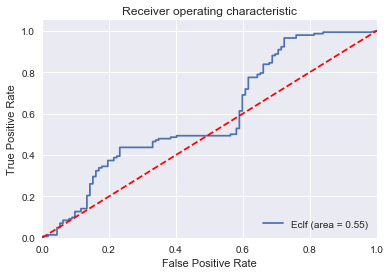

In [144]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

eclf = VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB()), ('Naive Bayes Multinomial', MultinomialNB()), 
                                    ('Naive Bayes Bernoulli', BernoulliNB())], voting='soft')
eclf.fit(X_train, y_train)

eclf_roc_auc = roc_auc_score(y_test, eclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, eclf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Eclf (area = %0.2f)' % eclf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Eclf_ROC')
plt.show()

#### Modelos Supervisados : Ensamble de Modelos 2

In [414]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
eclf2 = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier()), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier())],
                        voting='soft')

eclf2.fit(X_train, y_train) 



VotingClassifier(estimators=[('GBoost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [415]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = eclf2.predict(X_test)

In [416]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.757

	Precision: 0.773
	Recall: 0.893
	F1: 0.829



In [79]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.80      0.82       112
          1       0.85      0.87      0.86       142

avg / total       0.84      0.84      0.84       254



In [149]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
eclf2 = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0))],
                        voting='soft')
scoring = 'accuracy'
results = model_selection.cross_val_score(eclf2, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.834


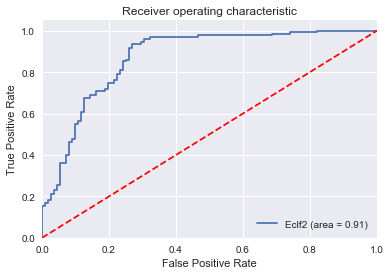

In [151]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

eclf2 = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0))],
                        voting='soft')
eclf2.fit(X_train, y_train)

eclf2_roc_auc = roc_auc_score(y_train, eclf2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_test, eclf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Eclf2 (area = %0.2f)' % eclf2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Eclf2_ROC')
plt.show()

In [155]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
#test_parametrica.head(5)
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [156]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = eclf2.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_Ensamble01.csv', index=False)

#### Modelos Supervisados : Stacking de Modelos

In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

stackclf = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft')

stackclf.fit(X_train, y_train) 


VotingClassifier(estimators=[('GBoost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_lea...wski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [81]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = stackclf.predict(X_test)

In [82]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.780

	Precision: 0.821
	Recall: 0.775
	F1: 0.797



In [83]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.79      0.76       112
          1       0.82      0.77      0.80       142

avg / total       0.78      0.78      0.78       254



In [161]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
stackclf = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier()),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft')
scoring = 'accuracy'
results = model_selection.cross_val_score(stackclf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.836


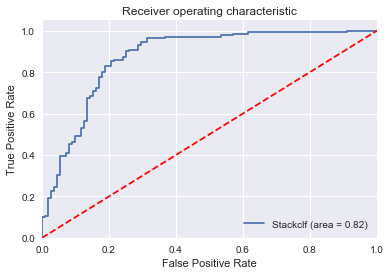

In [162]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

stackclf = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft')

stackclf.fit(X_train, y_train)

stackclf_roc_auc = roc_auc_score(y_test, stackclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, stackclf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stackclf (area = %0.2f)' % stackclf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Stack_ROC')
plt.show()

#### 8 ELECCIÓN DEL MEJOR MODELO

In [417]:
# Selección del mejor Modelo
# Cargamos todos los modelos que necesitamos

import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [418]:
kfolds = StratifiedKFold(shuffle=True, random_state=1)

In [419]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,ApplicantIncome_Recod
0,1.0,1.0,1.0,1.0,1.0,3086.0,0.0,120.0,360.0,2.0,2.0,3086.0,4.80,0.33,2.0
1,2.0,2.0,1.0,1.0,1.0,3716.0,0.0,42.0,180.0,2.0,1.0,3716.0,3.76,0.23,2.0


##### Creamos una función para probar todos nuestros modelos

In [420]:
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X, y)
    y_ = model.predict(X_test)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1), str(end - start)]

##### Agrupamos Familias de Modelos según nuestro criterio

In [421]:
# stackclf.fit(X_final, y_final) 
def run_linear_models(X, y):
    
    run_model(LogisticRegression(), X_train, y_train)
    run_model(RidgeClassifier(), X_train, y_train)
    run_model(MLPClassifier(max_iter=1000), X_train, y_train)
    
def run_misc_models(X, y):

    run_model(BernoulliNB(), X_train, y_train)
    run_model(KNeighborsClassifier(), X_train, y_train)
    run_model(DecisionTreeClassifier(), X_train, y_train)
    
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train, y_train)
    run_model(ExtraTreesClassifier(), X_train, y_train)
    run_model(AdaBoostClassifier(), X_train, y_train)
    run_model(GradientBoostingClassifier(), X_train, y_train)    
    run_model(XGBClassifier(), X_train, y_train)
    run_model(VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft'), X_train, y_train)

In [422]:
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])

#### Corremos todas las familias de modelos propuestos

In [423]:
run_linear_models(X, y)
run_misc_models(X, y)
run_ensemble_models(X, y)


LogisticRegression
RidgeClassifier
MLPClassifier
BernoulliNB
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier


TypeError: __init__() got an unexpected keyword argument 'num_leaves'

#### Tabla de Resultados con todos nuestros modelos

In [424]:
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
0,LogisticRegression,0.745946,0.0,0.818533,0.0,10
1,RidgeClassifier,0.751351,0.0,0.828358,0.0,229
2,MLPClassifier,0.545946,0.0,0.611111,0.0,42
3,BernoulliNB,0.562162,0.0,0.643172,0.0,2
4,KNeighborsClassifier,0.540541,0.0,0.618834,0.0,5
5,DecisionTreeClassifier,0.702703,0.0,0.777328,0.0,4
6,RandomForestClassifier,0.724324,0.0,0.795181,0.0,25
7,ExtraTreesClassifier,0.745946,0.0,0.817121,0.0,22
8,AdaBoostClassifier,0.702703,0.0,0.782609,0.0,108
9,GradientBoostingClassifier,0.751351,0.0,0.823077,0.0,112


#### Tabla de Resultados con todos nuestros modelos ordenados por algún criterio

In [425]:
results.iloc[results['accuracy'].sort_values(ascending=False).index].head(19)

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
10,XGBClassifier,0.756757,0.0,0.824903,0.0,59
9,GradientBoostingClassifier,0.751351,0.0,0.823077,0.0,112
1,RidgeClassifier,0.751351,0.0,0.828358,0.0,229
7,ExtraTreesClassifier,0.745946,0.0,0.817121,0.0,22
0,LogisticRegression,0.745946,0.0,0.818533,0.0,10
6,RandomForestClassifier,0.724324,0.0,0.795181,0.0,25
8,AdaBoostClassifier,0.702703,0.0,0.782609,0.0,108
5,DecisionTreeClassifier,0.702703,0.0,0.777328,0.0,4
3,BernoulliNB,0.562162,0.0,0.643172,0.0,2
2,MLPClassifier,0.545946,0.0,0.611111,0.0,42


### Listo!!!! Elegimos el mejor clasificador

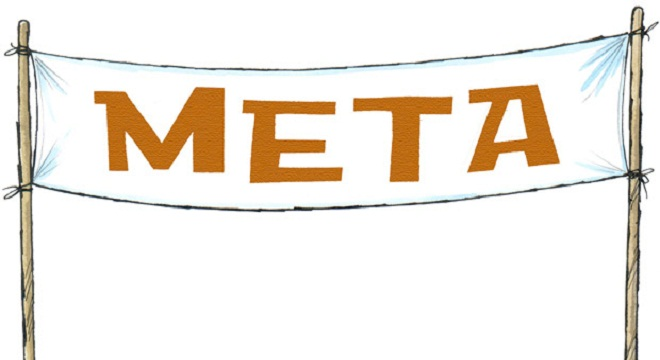